<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-II/blob/main/EVENTOS_DISCRETOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿QUÉ SON LOS EVENTOS DISCRETOS?
La simulación por eventos discretos es una técnica que modela sistemas donde los cambios ocurren en puntos específicos en el tiempo, llamados eventos.  
Ejemplos:
- Llegada de un cliente a una fila.
- Inicio o fin de un servicio.
- Salida de un cliente del sistema.

En este tipo de simulación, el tiempo avanza de un evento a otro, en lugar de hacerlo de manera continua. Esto permite representar sistemas complejos de forma eficiente.
## ¿Por qué una línea de espera con 3 servidores?
Las líneas de espera son comunes en la vida real: bancos, hospitales, call centers, páginas web, etc.  
Se eligió un modelo con 3 servidores porque:
- Representa un escenario realista, como una sucursal bancaria con 3 cajeros.
- Permite analizar cómo la capacidad del sistema afecta el tiempo de espera y el tiempo total en el sistema.
- Es un caso práctico para estudiar la eficiencia y la congestión en sistemas multi-servidor.
## ¿Qué es SimPy y para qué sirve?
SimPy es una librería de Python para simular sistemas por eventos discretos.  
Características:
- Fácil de usar y muy flexible.
- Permite modelar procesos, recursos y colas.
- Ideal para sistemas como líneas de espera, redes de computadoras, producción industrial, etc.
## ¿Por qué usar SimPy en este código?
- Simplicidad: SimPy maneja automáticamente la lógica de eventos y el avance del tiempo.
- Realismo: Podemos definir llegadas y servicios con distribuciones probabilísticas (como exponencial).
- Escalabilidad: Es fácil aumentar el número de servidores, cambiar parámetros o agregar más complejidad.
- Análisis: Permite calcular métricas clave como:
  - Tiempo promedio en el sistema (W).
  - Tiempo promedio en la cola (Wq).
  - Número de clientes atendidos.
  - Evolución del número de clientes en el sistema.

En resumen, SimPy es la herramienta perfecta para este tipo de simulación porque combina potencia y facilidad de implementación.


Tiempo promedio en el sistema (W): 0.169
Tiempo promedio en la cola (Wq): 0.0022
Número de clientes atendidos: 399651


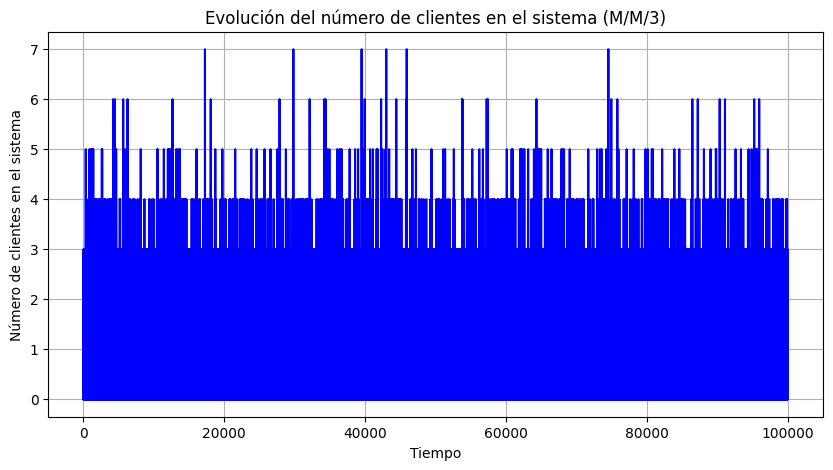

In [1]:
# Instalar SimPy
!pip install simpy
!pip install matplotlib

import simpy
import random
import statistics
import matplotlib.pyplot as plt

# Parámetros del sistema
LAMBDA = 4.0   # Tasa de llegadas
MU = 6.0       # Tasa de servicio por servidor
NUM_SERVIDORES = 3  # Número de servidores
SIM_TIME = 100000     # Tiempo total de simulación

# Variables para métricas y gráfica
tiempos_en_sistema = []
tiempos_en_cola = []
tiempo_eventos = []
clientes_en_sistema = []

# Proceso de cliente
def cliente(env, nombre, servidores):
    llegada = env.now
    # Solicita un servidor
    with servidores.request() as req:
        cola_inicio = env.now
        yield req
        espera = env.now - cola_inicio
        tiempos_en_cola.append(espera)

        # Tiempo de servicio
        servicio = random.expovariate(MU)
        yield env.timeout(servicio)

    salida = env.now
    tiempos_en_sistema.append(salida - llegada)

# Proceso de generación de llegadas
def generador_clientes(env, servidores):
    i = 0
    while True:
        interarribo = random.expovariate(LAMBDA)
        yield env.timeout(interarribo)
        i += 1
        env.process(cliente(env, f"Cliente {i}", servidores))

# Monitoreo del número de clientes en el sistema
def monitor(env, servidores):
    while True:
        tiempo_eventos.append(env.now)
        clientes_en_sistema.append(len(servidores.queue) + servidores.count)
        yield env.timeout(1)  # Registrar cada unidad de tiempo

# Configuración del entorno
env = simpy.Environment()
servidores = simpy.Resource(env, capacity=NUM_SERVIDORES)
env.process(generador_clientes(env, servidores))
env.process(monitor(env, servidores))

# Ejecutar simulación
env.run(until=SIM_TIME)

# Resultados
W = round(statistics.mean(tiempos_en_sistema), 4)
Wq = round(statistics.mean(tiempos_en_cola), 4)

print(f"Tiempo promedio en el sistema (W): {W}")
print(f"Tiempo promedio en la cola (Wq): {Wq}")
print(f"Número de clientes atendidos: {len(tiempos_en_sistema)}")

# Gráfica: Evolución del número de clientes en el sistema
plt.figure(figsize=(10, 5))
plt.step(tiempo_eventos, clientes_en_sistema, where='post', color='blue')
plt.title('Evolución del número de clientes en el sistema (M/M/3)')
plt.xlabel('Tiempo')
plt.ylabel('Número de clientes en el sistema')
plt.grid(True)
plt.show()

## CONCLUSIONES

1. Resultados obtenidos:
   - Tiempo promedio en el sistema (W): $0.169$  
   - Tiempo promedio en la cola (Wq): $0.0022$  
   - Número de clientes atendidos: $399,651$  

Estos valores indican que el sistema es altamente eficiente: los clientes pasan muy poco tiempo esperando en la cola y el tiempo total en el sistema es bajo.

2. Interpretación de la gráfica:   
   La gráfica muestra la *evolución del número de clientes en el sistema (M/M/3)* a lo largo del tiempo.  
   - Se observan fluctuaciones normales debido a la naturaleza aleatoria del proceso.
   - El número de clientes rara vez se acumula en exceso, lo que confirma que la capacidad del sistema (3 servidores) es adecuada para la tasa de llegada configurada.

3. ¿Por qué los tiempos son tan bajos?
   - La tasa de servicio (μ) es significativamente mayor que la tasa de llegada (λ), lo que permite atender rápidamente a los clientes.
   - Con 3 servidores trabajando en paralelo, la probabilidad de que todos estén ocupados es baja, reduciendo el tiempo de espera.

4. Aplicación práctica:
   - Sucursales bancarias: Para determinar cuántos cajeros se necesitan para mantener tiempos de espera aceptables.
   - Centros de atención al cliente: Para dimensionar el personal en función de la demanda.
   - Sistemas informáticos: Para analizar la capacidad de servidores frente a solicitudes concurrentes.

5. Recomendación:
   - Probar con diferentes tasas de llegada y servicio para simular horas pico.
   - Analizar la utilización de los servidores para confirmar que no hay sobrecapacidad.
   - Extender el modelo para incluir métricas como longitud promedio de la cola y distribución de tiempos de espera.